# Basics of logistic regression

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()

#Apply a fix to the statsmodels library
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

## Load the data

In [2]:
raw_data = pd.read_csv('2.01.Admittance.csv')
data = raw_data.copy()
data['Admitted'] = raw_data['Admitted'].map({'Yes': 1, 'No': 0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


## Declare the dependent and the independent variables

In [3]:
y = data['Admitted']
x1 = data['SAT']

## Regression

In [4]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


## Summary

In [5]:
# Get the regression summary
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Tue, 04 Mar 2025   Pseudo R-squ.:                  0.7992
Time:                        13:55:40   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Looking into LL-null

In [6]:
# Create a variable only of 1s
const = np.ones(168)
const

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [7]:
reg_null = sm.Logit(y,const)
results_null = reg_null.fit()
results_null.summary()

Optimization terminated successfully.
         Current function value: 0.686044
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      167
Method:                           MLE   Df Model:                            0
Date:                Tue, 04 Mar 2025   Pseudo R-squ.:               7.410e-11
Time:                        13:55:40   Log-Likelihood:                -115.26
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2392      0.155      1.539      0.124      -0.065       0.544
==============================================================================
"""

### Plot a logistic regression curve

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


C:\Users\jbroeke\AppData\Local\Temp\ipykernel_9960\2341553516.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))


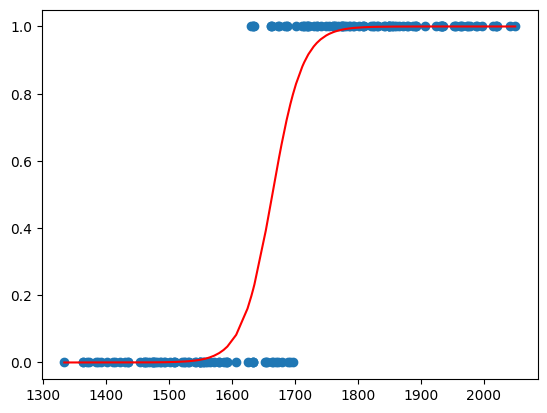

<Figure size 2000x2000 with 0 Axes>

In [8]:
# Creating a logit regression (we will discuss this in another notebook)
reg_log = sm.Logit(y,x)
# Fitting the regression
results_log = reg_log.fit()

# Creating a logit function, depending on the input and coefficients
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

# Sorting the y and x, so we can plot the curve
f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))
ax = plt.scatter(x1,y,color='C0')
#plt.xlabel('SAT', fontsize = 20)
#plt.ylabel('Admitted', fontsize = 20)
# Plotting the curve
ax2 = plt.plot(x_sorted,f_sorted,color='red')
plt.figure(figsize=(20,20))
plt.show()

In [9]:
np.exp(4.20)

np.float64(66.68633104092515)